In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno#Graficar para  valores nulos
from sklearn.preprocessing import  LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
import numpy as np

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize

In [97]:
df = pd.read_excel("gruposExamenIIB.xlsx")

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27706 entries, 0 to 27705
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      27706 non-null  int64  
 1   MES                             27706 non-null  int64  
 2   REGIMEN ADUANERO                27706 non-null  int64  
 3   DAU                             27706 non-null  float64
 4   IMPORTADOR                      27706 non-null  int64  
 5   PAIS DE PROCEDENCIA             27706 non-null  int64  
 6   ADUANA                          27706 non-null  int64  
 7   PARTIDA ARANCELARIA             27706 non-null  int64  
 8   DESCRIPCIÓN ARANCELARIA         27706 non-null  int64  
 9   DESCRIPCION PRODUCTO COMERCIAL  27706 non-null  int64  
 10  BULTOS                          27706 non-null  float64
 11  CANTIDAD                        27706 non-null  int64  
 12  UNIDAD DE MEDIDA                

In [99]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,27706.0,1.385250e+04,7.998178e+03,0.000000e+00,6.926250e+03,1.385250e+04,2.077875e+04,2.770500e+04
MES,27706.0,7.015051e+00,3.364564e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
REGIMEN ADUANERO,27706.0,7.079044e+00,2.698127e-01,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00
DAU,27706.0,7.092212e+05,1.295558e+06,1.010000e+02,9.320000e+02,3.842000e+03,1.001282e+06,3.916160e+06
IMPORTADOR,27706.0,1.326086e+03,8.097624e+02,0.000000e+00,7.160000e+02,1.221000e+03,1.954750e+03,2.973000e+03
PAIS DE PROCEDENCIA,27706.0,2.202227e+01,1.584419e+01,0.000000e+00,8.000000e+00,8.000000e+00,4.200000e+01,4.600000e+01
ADUANA,27706.0,3.134844e+00,6.625088e-01,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
PARTIDA ARANCELARIA,27706.0,8.386725e+09,3.717433e+08,7.323911e+09,8.516790e+09,8.516790e+09,8.516790e+09,8.516790e+09
DESCRIPCIÓN ARANCELARIA,27706.0,2.586949e+00,6.145983e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
DESCRIPCION PRODUCTO COMERCIAL,27706.0,3.399408e+03,1.725068e+03,0.000000e+00,1.977000e+03,3.412000e+03,4.795000e+03,6.533000e+03


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'MES'}>,
        <AxesSubplot:title={'center':'REGIMEN ADUANERO'}>,
        <AxesSubplot:title={'center':'DAU'}>,
        <AxesSubplot:title={'center':'IMPORTADOR'}>,
        <AxesSubplot:title={'center':'PAIS DE PROCEDENCIA'}>],
       [<AxesSubplot:title={'center':'ADUANA'}>,
        <AxesSubplot:title={'center':'PARTIDA ARANCELARIA'}>,
        <AxesSubplot:title={'center':'DESCRIPCIÓN ARANCELARIA'}>,
        <AxesSubplot:title={'center':'DESCRIPCION PRODUCTO COMERCIAL'}>,
        <AxesSubplot:title={'center':'BULTOS'}>,
        <AxesSubplot:title={'center':'CANTIDAD'}>],
       [<AxesSubplot:title={'center':'UNIDAD DE MEDIDA'}>,
        <AxesSubplot:title={'center':'ADVALOREM'}>,
        <AxesSubplot:title={'center':'EMPRESA DE TRANSPORTE'}>,
        <AxesSubplot:title={'center':'PAÍS DE EMBARQUE'}>,
        <AxesSubplot:title={'center':'CONTENEDOR'}>,
        <AxesSubplot:title={'center':'NAVE

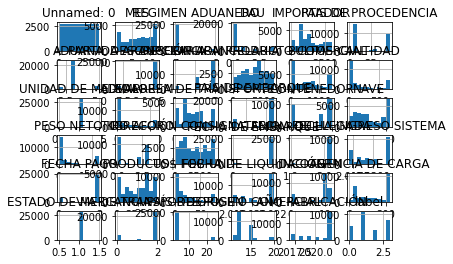

In [100]:
df.hist()

In [101]:
labelEncoder = LabelEncoder()
df_aux_LabelEN = df
df_aux_LabelEN['label'] = labelEncoder.fit_transform(df_aux_LabelEN['label'])
y = df_aux_LabelEN['label']
X = df_aux_LabelEN.drop('label',axis=1)

In [102]:
X

,Unnamed: 0,MES,REGIMEN ADUANERO,DAU,IMPORTADOR,PAIS DE PROCEDENCIA,ADUANA,PARTIDA ARANCELARIA,DESCRIPCIÓN ARANCELARIA,DESCRIPCION PRODUCTO COMERCIAL,...,PRODUCTO,US$ FOB UNIT,FECHA DE LIQUIDACIÓN,INCOTERM,AGENCIA DE CARGA,ESTADO DE MERCANCIA,VIA DE TRANSPORTE,PAÍS DE ORIGEN,DEPOSITO COMERCIAL,AÑO FABRICACIÓN
0,0,1,7,1.070000e+02,2785,8,3,8516790000,2,4315,...,3117,0.160000,20220114,10,218,1,2,2,12,2022
1,1,1,7,3.916160e+06,232,42,3,8516500000,1,3408,...,2564,9.000000,20220105,10,127,1,2,25,15,2021
2,2,1,7,3.916160e+06,232,42,3,8516790000,2,4136,...,3025,10.000000,20220105,10,127,1,2,25,15,2021
3,3,1,7,3.916160e+06,232,42,3,8516790000,2,4035,...,2961,11.000000,20220105,10,127,1,2,25,15,2021
4,4,1,7,3.916160e+06,232,42,3,8516790000,2,4054,...,2980,11.000000,20220105,10,127,1,2,25,15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27701,27701,12,8,3.916160e+06,1775,42,5,8516790000,3,4699,...,4733,51.924529,20221109,12,221,1,0,2,12,2022
27702,27702,12,8,3.916160e+06,1128,42,2,8516790000,3,2891,...,4733,51.924529,20221109,12,221,1,0,2,12,2022
27703,27703,12,8,3.916160e+06,993,42,5,8516790000,3,5477,...,4733,51.924529,20221109,12,221,1,0,2,12,2022
27704,27704,12,8,3.916160e+06,2424,42,5,8516790000,3,3702,...,4733,51.924529,20221109,12,221,1,0,2,12,2022


In [103]:
y

0        3
1        3
2        2
3        2
4        2
        ..
27701    2
27702    2
27703    2
27704    2
27705    2
Name: label, Length: 27706, dtype: int64

In [104]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

ENTRENAMIENTO

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=500,test_size=0.2)

In [106]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [107]:
ann = Sequential()
ann.add(Dense(16,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(4,activation='softmax'))
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ann.fit(x=X_train, y=y_train, validation_data = (X_test,y_test),batch_size=500,epochs=200,verbose=1)

Epoch 1/200
45/45 [==============================] - 1s 12ms/step - loss: 1.3465 - accuracy: 0.3162 - val_loss: 1.2412 - val_accuracy: 0.5291
Epoch 2/200
45/45 [==============================] - 0s 6ms/step - loss: 1.1338 - accuracy: 0.6264 - val_loss: 0.9997 - val_accuracy: 0.7297
Epoch 3/200
45/45 [==============================] - 0s 6ms/step - loss: 0.8562 - accuracy: 0.8096 - val_loss: 0.6892 - val_accuracy: 0.8766
Epoch 4/200
45/45 [==============================] - 0s 7ms/step - loss: 0.5508 - accuracy: 0.9090 - val_loss: 0.4102 - val_accuracy: 0.9388
Epoch 5/200
45/45 [==============================] - 0s 7ms/step - loss: 0.3247 - accuracy: 0.9470 - val_loss: 0.2477 - val_accuracy: 0.9596
Epoch 6/200
45/45 [==============================] - 0s 8ms/step - loss: 0.2048 - accuracy: 0.9676 - val_loss: 0.1665 - val_accuracy: 0.9729
Epoch 7/200
45/45 [==============================] - 0s 6ms/step - loss: 0.1432 - accuracy: 0.9764 - val_loss: 0.1215 - val_accuracy: 0.9818
Epoch 8/200


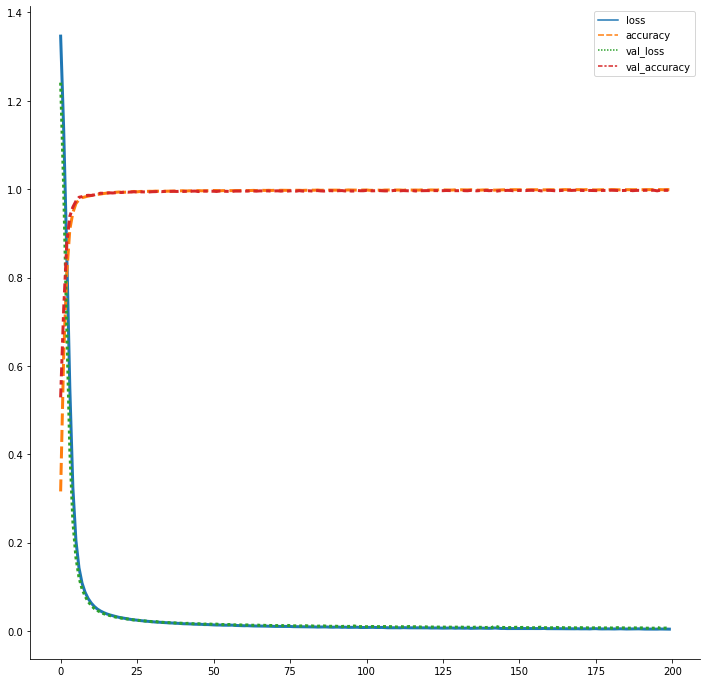

In [108]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss,lw=3)
sns.despine()

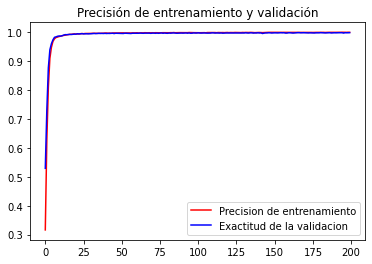

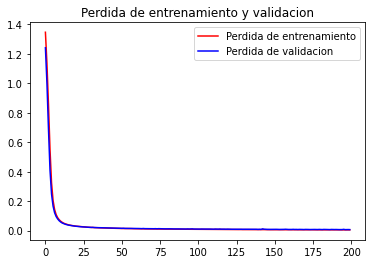

In [109]:
accuracy = ann.history.history['accuracy']
val_accuracy = ann.history.history['val_accuracy']
loss = ann.history.history['loss']
val_loss = ann.history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Precision de entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Exactitud de la validacion')
plt.title('Precisión de entrenamiento y validación')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Perdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Perdida de validacion')
plt.title('Perdida de entrenamiento y validacion')
plt.legend()
plt.show()

In [110]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

174/174 [==============================] - 0s 1ms/step


In [111]:
y_pred_train
y_pred_test

array([[0.0000000e+00, 5.8569895e-29, 9.9999994e-01, 6.4954455e-30],
       [2.0039412e-19, 9.9999994e-01, 1.2689071e-10, 1.2724032e-08],
       [9.3326357e-28, 7.3284056e-08, 9.9999982e-01, 1.9127073e-18],
       ...,
       [8.5431963e-20, 1.0000000e+00, 2.1344771e-13, 6.7975916e-12],
       [1.4121777e-11, 1.0000000e+00, 4.0893924e-10, 1.7803139e-08],
       [3.5713461e-16, 9.9999392e-01, 7.3286169e-11, 6.0808693e-06]],
      dtype=float32)

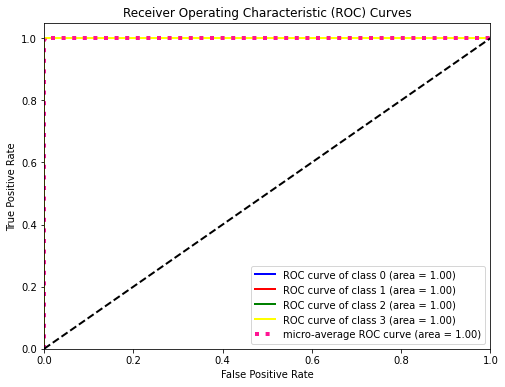

In [112]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio de las curvas ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Dibujar las curvas ROC
plt.figure(figsize=(8,6))

# Colores de las curvas ROC
colors = cycle(['blue', 'red', 'green', 'yellow'])

for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [113]:
y_pred_test_a = y_pred_test
y_pred_train_a = y_pred_train

In [114]:
for i in range(len(y_pred_test_a)):
  index = list(y_pred_test_a[i]).index(max(y_pred_test_a[i]))
  for j in range(len(y_pred_test_a[i])):
    y_pred_test_a[i][j]=0
  y_pred_test_a[i][index]=1

for i in range(len(y_pred_train_a)):
  index = list(y_pred_train_a[i]).index(max(y_pred_train_a[i]))
  for j in range(len(y_pred_train_a[i])):
    y_pred_train_a[i][j]=0
  y_pred_train_a[i][index]=1

In [115]:
y_pred_train_a

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [116]:
y_train

,0,1,2,3
1487,0,0,0,1
10041,0,0,0,1
19258,0,0,1,0
17078,0,1,0,0
5253,0,0,0,1
...,...,...,...,...
19389,0,1,0,0
3790,0,0,0,1
8465,0,0,0,1
12097,0,1,0,0


In [117]:
cm = accuracy_score(y_test, y_pred_test)
print(cm)

0.9978347167087694


In [118]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4382
           1       1.00      1.00      1.00      8670
           2       1.00      1.00      1.00      2987
           3       1.00      1.00      1.00      6125

   micro avg       1.00      1.00      1.00     22164
   macro avg       1.00      1.00      1.00     22164
weighted avg       1.00      1.00      1.00     22164
 samples avg       1.00      1.00      1.00     22164



In [119]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       1.00      1.00      1.00      2143
           2       1.00      0.99      1.00       742
           3       1.00      1.00      1.00      1529

   micro avg       1.00      1.00      1.00      5542
   macro avg       1.00      1.00      1.00      5542
weighted avg       1.00      1.00      1.00      5542
 samples avg       1.00      1.00      1.00      5542



In [120]:
score = ann.evaluate(X_test, y_test, verbose=1)
print('accuracy: ',score[1])
print('loss: ',score[0])

174/174 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9978
accuracy:  0.9978347420692444
loss:  0.006572377867996693


In [121]:
matriz = multilabel_confusion_matrix(y_test, y_pred_test)

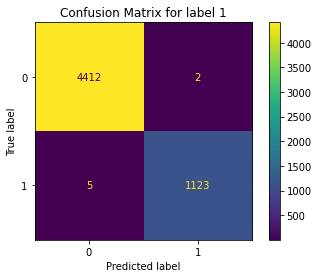

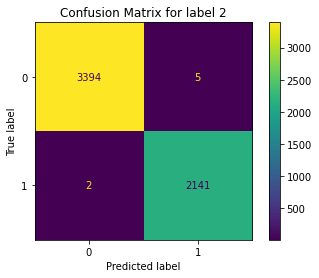

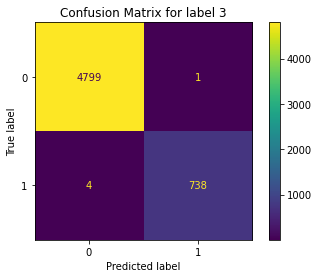

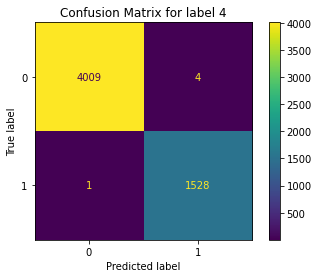

In [122]:
cmd = ConfusionMatrixDisplay(matriz[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1')
plt.show()
cmd = ConfusionMatrixDisplay(matriz[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2')
plt.show()
cmd = ConfusionMatrixDisplay(matriz[2], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 3')
plt.show()
cmd = ConfusionMatrixDisplay(matriz[3], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 4')
plt.show()

#SVM

In [123]:
from mlxtend.evaluate import confusion_matrix as confusion_matrix2
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [124]:
confusion_matrix2(y_train.to_numpy().argmax(axis=1),y_pred_train.argmax(axis=1),binary=True, 
                      positive_label=1)

array([[13483,    11],
       [    0,  8670]])

In [125]:
y_train

,0,1,2,3
1487,0,0,0,1
10041,0,0,0,1
19258,0,0,1,0
17078,0,1,0,0
5253,0,0,0,1
...,...,...,...,...
19389,0,1,0,0
3790,0,0,0,1
8465,0,0,0,1
12097,0,1,0,0


In [126]:
y_pred_train

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [127]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22164, 35)
(22164, 4)
(5542, 35)
(5542, 4)


In [128]:
svm = LinearSVC(random_state=500)
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)
multilabel_classifier = multilabel_classifier.fit(X_train, y_train)

In [129]:
y_train_pred_svc = multilabel_classifier.predict(X_train)
y_train_pred_svc

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [130]:
y_test_pred_svc = multilabel_classifier.predict(X_test)
y_test_pred_svc

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

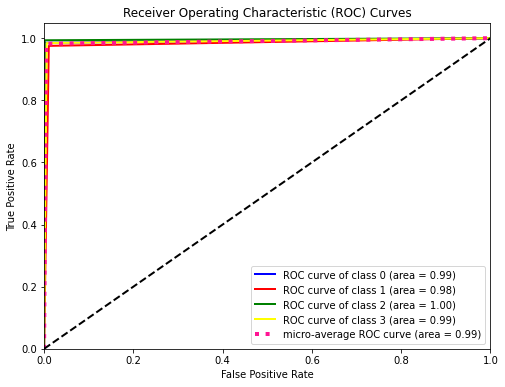

In [131]:
y_test_bin_svm = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_svm[:, i], y_test_pred_svc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio de las curvas ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin_svm.ravel(), y_test_pred_svc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Dibujar las curvas ROC
plt.figure(figsize=(8,6))

# Colores de las curvas ROC
colors = cycle(['blue', 'red', 'green', 'yellow'])

for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [132]:
matrices = multilabel_confusion_matrix(y_test, y_test_pred_svc)

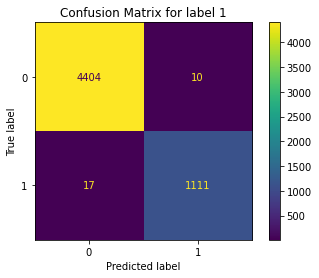

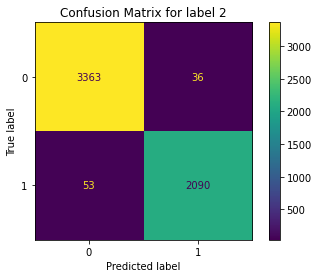

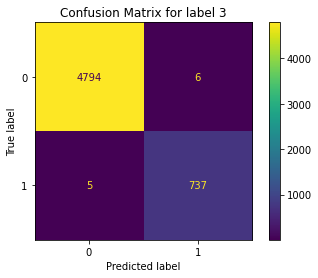

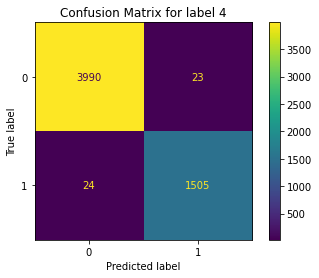

In [133]:
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[2], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 3')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[3], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 4')
plt.show()

In [134]:
accuracy_score(y_train,y_train_pred_svc)

0.9714401732539253

In [135]:
accuracy_score(y_test,y_test_pred_svc)

0.971670876939733

In [136]:
print(classification_report(y_train,y_train_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4382
           1       0.98      0.98      0.98      8670
           2       0.99      0.99      0.99      2987
           3       0.99      0.98      0.99      6125

   micro avg       0.99      0.98      0.98     22164
   macro avg       0.99      0.99      0.99     22164
weighted avg       0.99      0.98      0.98     22164
 samples avg       0.98      0.98      0.98     22164



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
print(classification_report(y_test,y_test_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1128
           1       0.98      0.98      0.98      2143
           2       0.99      0.99      0.99       742
           3       0.98      0.98      0.98      1529

   micro avg       0.99      0.98      0.98      5542
   macro avg       0.99      0.98      0.99      5542
weighted avg       0.99      0.98      0.98      5542
 samples avg       0.98      0.98      0.98      5542



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#KNN

In [138]:
error = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_predict_train_knn = knn.predict(X_train)
  error.append(np.mean(y_predict_train_knn!=y_train))

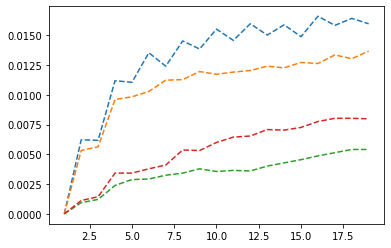

In [139]:
plt.plot(range(1,20),error,linestyle='dashed')

In [140]:
error = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_predict_test_knn = knn.predict(X_test)
  error.append(np.mean(y_predict_test_knn!=y_test))

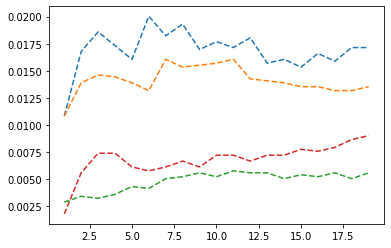

In [141]:
plt.plot(range(1,20),error,linestyle='dashed')

In [142]:
knn = KNeighborsClassifier(n_neighbors=4, metric= "euclidean")
knn.fit(X_train,y_train)
y_predict_train_knn = knn.predict(X_train)
y_predict_test_knn = knn.predict(X_test)

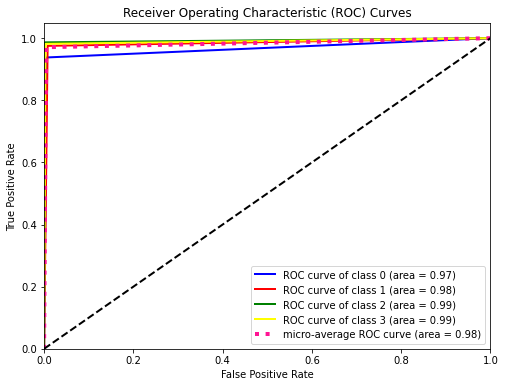

In [143]:
y_test_bin_knn = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_knn[:, i], y_predict_test_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio de las curvas ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin_knn.ravel(), y_predict_test_knn.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Dibujar las curvas ROC
plt.figure(figsize=(8,6))

# Colores de las curvas ROC
colors = cycle(['blue', 'red', 'green', 'yellow'])

for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [144]:
accuracy_score(y_train,y_predict_train_knn)

0.9774860133549901

In [145]:
accuracy_score(y_test,y_predict_test_knn)

0.9709491158426561

In [146]:
print(classification_report(y_train,y_predict_train_knn))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4382
           1       1.00      0.98      0.99      8670
           2       1.00      0.99      0.99      2987
           3       1.00      0.99      0.99      6125

   micro avg       1.00      0.98      0.99     22164
   macro avg       1.00      0.98      0.99     22164
weighted avg       1.00      0.98      0.99     22164
 samples avg       0.98      0.98      0.98     22164



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
print(classification_report(y_test,y_predict_test_knn))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1128
           1       0.99      0.98      0.98      2143
           2       0.99      0.99      0.99       742
           3       0.99      0.98      0.99      1529

   micro avg       0.99      0.97      0.98      5542
   macro avg       0.99      0.97      0.98      5542
weighted avg       0.99      0.97      0.98      5542
 samples avg       0.97      0.97      0.97      5542



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
matricesKNN = multilabel_confusion_matrix(y_test, y_predict_test_knn)

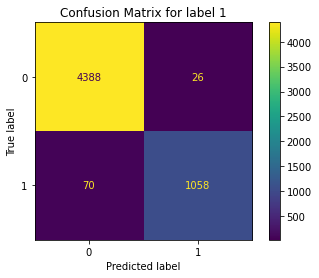

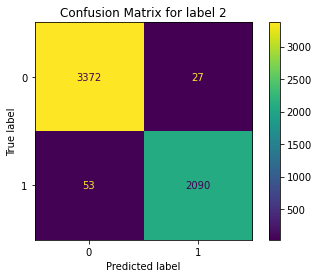

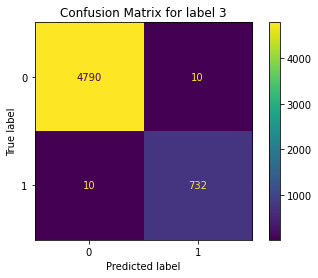

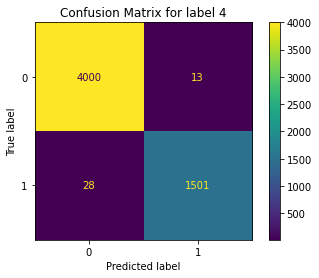

In [149]:
cmd = ConfusionMatrixDisplay(matricesKNN[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1')
plt.show()
cmd = ConfusionMatrixDisplay(matricesKNN[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2')
plt.show()
cmd = ConfusionMatrixDisplay(matricesKNN[2], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 3')
plt.show()
cmd = ConfusionMatrixDisplay(matricesKNN[3], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 4')
plt.show()

In [150]:
import pickle
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)